## Занятие 6
## Математический анализ
## Дифференцирование

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
x = sympy.Symbol("x")
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

#### 1. Область определения

In [2]:
x = sympy.Symbol("x")
def f(x):
    return x**2 * np.e**(-x)
D = continuous_domain(f(x), x, S.Reals)
D

Reals

#### 2.Чётность

In [3]:
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')   
else:
    print('Функция общего вида')

Функция общего вида


#### 3. Периодичность

Функция не периодична

#### 4. Точки пересечения с осями координат

In [4]:
roots = list(solveset(f(x), domain=S.Reals))
roots.sort()
roots

[0]

#### 5. Точки экстремума

In [5]:
df = f(x).diff(x)
df_roots = solve(df, x)
print("Точки нуля производной: ", ", ".join(map(str, df_roots)))
points = [df_roots[0] - 1 ]
points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots) - 1)])
points.append(df_roots[-1] + 1)                                                                
max_arr = []
min_arr = []
for i, item in enumerate(df_roots):
    df_left = df.subs(x, points[i])
    df_right = df.subs(x, points[i + 1])
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item) 
print("Точки максимума: ", ", ".join(map(str, max_arr)))
print("Точки минимума: ", ", ".join(map(str, min_arr)))

Точки нуля производной:  0.0, 2.00000000000000
Точки максимума:  2.00000000000000
Точки минимума:  0.0


#### 6. Точки перегиба

In [6]:
df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
df2_roots.sort() # Упорядочили корни по возрастанию
print("Точки нуля второй производной: ", ", ".join(map(str, df2_roots)))
points2 = [df2_roots[0] - 1 ]
points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots) - 1)])
points2.append(df2_roots[-1] + 1)                                                                
inflection_arr = [item for i, item in enumerate(df2_roots) if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0]
print("Точки перегиба: ", ", ".join(map(str, inflection_arr)))

Точки нуля второй производной:  0.585786437626905, 3.41421356237309
Точки перегиба:  0.585786437626905, 3.41421356237309


#### 7. Асимптоты

In [7]:
y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
display(y0pos, y0neg)

kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
    b = sympy.limit(f(x) - k*x, x, sympy.oo)
    y_as = k*x + b
    display(y_as)
else:
    bpos = sympy.limit(f(x) - kpos*x, x, sympy.oo)
    bneg = sympy.limit(f(x) - kpos*x, x, sympy.oo)
    y_as_pos = kpos*x + bpos
    y_as_neg = kneg*x + bneg
    display(y_as_pos, y_as_neg)

0

oo

0

-oo*x

Существует правая асимптота y = 0

#### 8. График

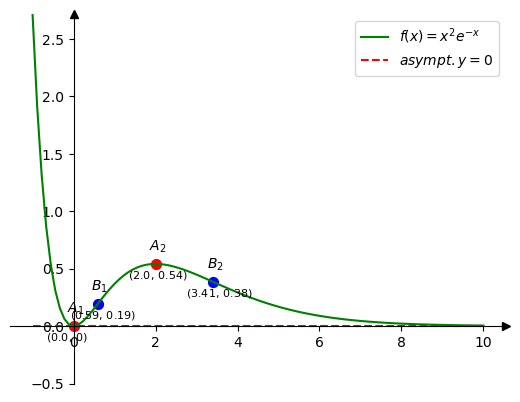

In [18]:
ax = plt.gca() 
X = np.linspace(-1, 10, 100)
X_D = [x for x in X if x in D] 
Y_D = [f(x) for x in X if x in D]
minY = min(Y_D)-0.5
maxY = max(Y_D)
ax.plot(X, f(X), color='green', label=r'$f(x)=' + 'x^2e^{-x}' + r'$')
ax.plot(X, [0 for i in X], color='red', label=r'$asympt. y=0' + r'$', linestyle='--')
ax.set_ylim(minY, maxY)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='best')
for i, x0 in enumerate(sorted(min_arr+max_arr)):
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red')
    XYtext = (-20, -10)
    ax.annotate(r'$\left(' + latex(round(x0,2)) + ',\,' + latex(round(f0,2)) + r'\right)$', xy=(x0, f0), xycoords='data',
             xytext=XYtext, textcoords='offset points', fontsize=8)
    ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
             xytext=(-5, 10), textcoords='offset points', fontsize=10)
for i, x0 in enumerate(inflection_arr):
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='blue')
    XYtext = (-20, -10)
    ax.annotate(r'$\left(' + latex(round(x0,2)) + ',\,' + latex(round(f0,2)) + r'\right)$', xy=(x0, f0), xycoords='data',
             xytext=XYtext, textcoords='offset points', fontsize=8)
    ax.annotate(r'$B_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
             xytext=(-5, 10), textcoords='offset points', fontsize=10)

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

#### 1. Область определения

In [38]:
x = sympy.Symbol("x")
def f(x):
    return x * np.e**(2/x)+1
D = continuous_domain(f(x), x, S.Reals)
D

Union(Interval.open(-oo, 0), Interval.open(0, oo))

#### 2.Чётность

In [20]:
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')   
else:
    print('Функция общего вида')

Функция общего вида


#### 3. Периодичность

Функция не периодична

#### 4. Точки пересечения с осями координат

-2.34575075492277

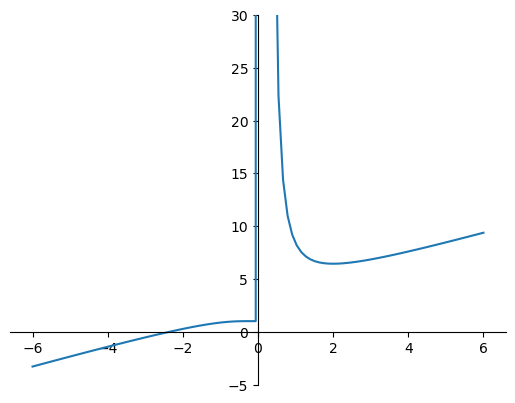

In [41]:
X = np.linspace(-6, 6, 100)
Y = f(X)
ax = plt.gca()  
ax.plot(X, Y)
ax.set_ylim(-5, 30)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
roots = sympy.nsolve(f(x), x, -2)
roots

#### 5. Точки экстремума

In [42]:
df = f(x).diff(x)
df_roots = solve(df, x)
print("Точки нуля производной: ", ", ".join(map(str, df_roots)))
points = [df_roots[0] - 1 ]
points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots) - 1)])
points.append(df_roots[-1] + 1)                                                                
max_arr = []
min_arr = []
for i, item in enumerate(df_roots):
    df_left = df.subs(x, points[i])
    df_right = df.subs(x, points[i + 1])
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item) 
print("Точки максимума: ", ", ".join(map(str, max_arr)))
print("Точки минимума: ", ", ".join(map(str, min_arr)))

Точки нуля производной:  2.00000000000000
Точки максимума:  
Точки минимума:  2.00000000000000


#### 6. Точки перегиба

In [43]:
df2 = f(x).diff(x, 2)
display(df2)

4.0*2.71828182845905**(2/x)/x**3

Точек перегиба нет

#### 7. Асимптоты

Существует вертикальная асимптота х = 0

In [55]:
v_as = 0
print(f(x).limit(x, v_as, dir='-'), f(x).limit(x, v_as))

-oo oo


In [44]:
y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
display(y0pos, y0neg)

kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
    b = sympy.limit(x * np.e**(2/x)+1 - x, x, sympy.oo)
    y_as = simplify(k*x + b)
    display(y_as)
else:
    bpos = sympy.limit(f(x) - kpos*x, x, sympy.oo)
    bneg = sympy.limit(f(x) - kpos*x, x, sympy.oo)
    y_as_pos = kpos*x + bpos
    y_as_neg = kneg*x + bneg
    display(y_as_pos, y_as_neg)

oo

-oo

x + 1 + log(2955622439572270452199010761/400000000000000000000000000)

#### 8. График

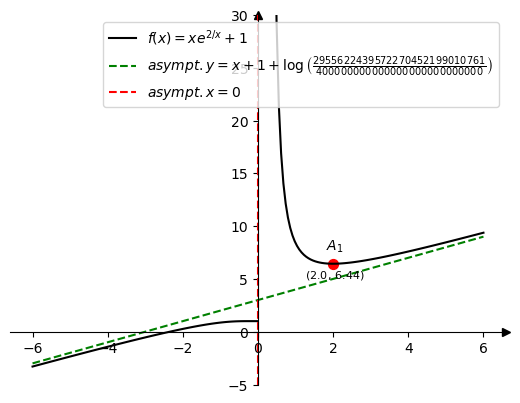

In [47]:
ax = plt.gca() 
X1 = np.linspace(v_as-6, float(v_as - 0.01), 100) 
X2 = np.linspace(float(v_as + 0.01), v_as+6, 100)
Y1 = f(X1)
Y2 = f(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + "xe^{2/x} + 1" + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-')
minY = -5
maxY = 30
ax.set_ylim(minY, maxY)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')
ax.axvline(x=v_as, color='red', label=r'$asympt. x=' + sympy.latex(v_as) + r'$', linestyle='--')  
ax.legend(loc='best')
for i, x0 in enumerate(sorted(min_arr+max_arr)):
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red')
    XYtext = (-20, -10)
    ax.annotate(r'$\left(' + latex(round(x0,2)) + ',\,' + latex(round(f0,2)) + r'\right)$', xy=(x0, f0), xycoords='data',
             xytext=XYtext, textcoords='offset points', fontsize=8)
    ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
             xytext=(-5, 10), textcoords='offset points', fontsize=10)


## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 
$$
f(x) = \frac{(4x−7)(6x−1)}{x−4}
$$

#### 1. Область определения

In [48]:
x = sympy.Symbol("x")
def f(x):
    return ((4*x-7)*(6*x-1))/(x-4)
D = continuous_domain(f(x), x, S.Reals)
D

Union(Interval.open(-oo, 4), Interval.open(4, oo))

#### 2.Чётность

In [49]:
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')   
else:
    print('Функция общего вида')

Функция общего вида


#### 3. Периодичность

Функция не периодична

#### 4. Точки пересечения с осями координат

In [50]:
roots = list(solveset(f(x), domain=S.Reals))
roots.sort()
roots

[1/6, 7/4]

#### 5. Точки экстремума

In [51]:
df = f(x).diff(x)
df_roots = solve(df, x)
print("Точки нуля производной: ", ", ".join(map(str, df_roots)))
points = [df_roots[0] - 1 ]
points.extend([(df_roots[i] + 2*df_roots[i + 1])/3 for i in range(len(df_roots) - 1)])
points.append(df_roots[-1] + 1)    
max_arr = []
min_arr = []
for i, item in enumerate(df_roots):
    df_left = simplify(df.subs(x, points[i]))
    df_right = simplify(df.subs(x, points[i + 1]))
    if df_left < 0 and df_right > 0:
        min_arr.append(item)
    elif df_left > 0 and df_right < 0:
        max_arr.append(item) 
print("Точки максимума: ", ", ".join(map(str, max_arr)))
print("Точки минимума: ", ", ".join(map(str, min_arr)))

Точки нуля производной:  4 - sqrt(138)/4, sqrt(138)/4 + 4
Точки максимума:  4 - sqrt(138)/4
Точки минимума:  sqrt(138)/4 + 4


#### 6. Точки перегиба

In [52]:
df2 = simplify(f(x).diff(x, 2))
display(df2)


414/(x**3 - 12*x**2 + 48*x - 64)

Точки нуля второй производной:  


Точек перигиба нет

#### 7. Асимптоты

Существует вертикальная асимптота х = 4

In [55]:
v_as = 4
print(f(x).limit(x, v_as, dir='-'), f(x).limit(x, v_as))

-oo oo


In [56]:
y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
display(y0pos, y0neg)

kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
    b = sympy.limit(f(x) - k*x, x, sympy.oo)
    y_as = k*x + b
    display(y_as)
else:
    bpos = sympy.limit(f(x) - kpos*x, x, sympy.oo)
    bneg = sympy.limit(f(x) - kpos*x, x, sympy.oo)
    y_as_pos = kpos*x + bpos
    y_as_neg = kneg*x + bneg
    display(y_as_pos, y_as_neg)

oo

-oo

24*x + 50

#### 8. График

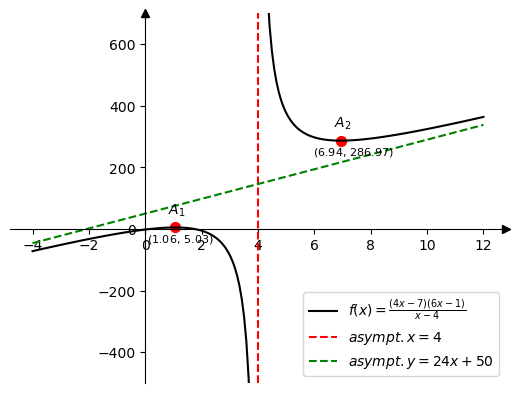

In [59]:
ax = plt.gca() 
X1 = np.linspace(v_as-8, float(v_as - 0.01), 100) 
X2 = np.linspace(float(v_as + 0.01), v_as+8, 100)
Y1 = f(X1)
Y2 = f(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-')
minY = -500
maxY = 700
ax.set_ylim(minY, maxY)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)
for i, x0 in enumerate(sorted(min_arr+max_arr)):
    f0 = f(x0)
    ax.scatter([x0],[f0], 50, color='red')
    XYtext = (-20, -10)
    ax.annotate(r'$\left(' + latex(round(x0,2)) + ',\,' + latex(round(f0,2)) + r'\right)$', xy=(x0, f0), xycoords='data',
             xytext=XYtext, textcoords='offset points', fontsize=8)
    ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
             xytext=(-5, 10), textcoords='offset points', fontsize=10)
ax.axvline(x=v_as, color='red', label=r'$asympt. x=' + sympy.latex(v_as) + r'$', linestyle='--')   
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')
ax.legend(loc='lower right')
